# SLU03 | Visualization with Pandas and Matplotlib: Examples notebook

## 1. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[5,3.7]

## 2. Loading sample data

Our main objective for these exercises is to help a supermarket understand more about its sales through visualizations. To do this we are going to use a **modified version** of the [Supermarket Sales dataset](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales).

The dataset contains sales information for several stores and is located at `data/supermarket_sales.csv`. It has the following fields:

>**`city`**: Location of the supermarket   
>**`gender`**: Gender of the customer   
>**`product_line`**: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel   
>**`quantity`**: Number of products purchased by the customer   
>**`total`**: Total price including tax   
>**`date`**: Date of purchase (Record available from January 2019 to March 2019)   
>**`time`**: Purchase time (10am to 9pm)   
>**`payment`**: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)    
>**`tax`**: 5% tax payment of the purchase

There are multiple ways to aggregate this data, and we will explore some of them.

In [2]:
supermarket_sales = pd.read_csv('data/supermarket_sales.csv', encoding='utf_8', sep=';')
rows, columns = supermarket_sales.shape
print(f'supermarket_sales:  {rows} records and {columns} fields.')
supermarket_sales.head()

supermarket_sales:  1000 records and 9 fields.


,city,gender,product_line,quantity,total,date,time,payment,tax
0,Yangon,Female,Health and beauty,7,548.9715,1/5/2019,13:08,Ewallet,26.1415
1,Naypyitaw,Female,Electronic accessories,5,80.2200,3/8/2019,10:29,Cash,3.8200
2,Yangon,Male,Home and lifestyle,7,340.5255,3/3/2019,13:23,Credit card,16.2155
3,Yangon,Male,Health and beauty,8,489.0480,1/27/2019,20:33,Ewallet,23.2880
4,Yangon,Male,Sports and travel,7,634.3785,2/8/2019,10:37,Ewallet,30.2085


## 3. Plotting

### 3.1 The scatterplot 
This will help us to see if there is any correlation between the tax and the total columns. There should be, right!?

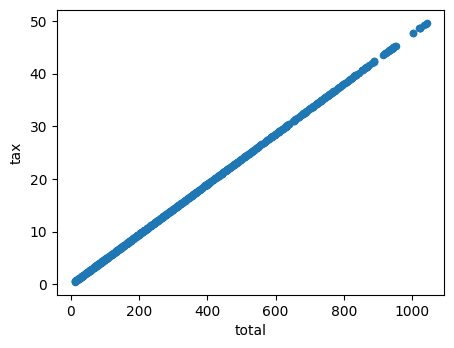

In [3]:
# code required to plot
supermarket_sales.plot.scatter(x='total', y='tax');

One assumption we can check is if our records with more units are the ones that have the highest value. In this case we want to know if **`total`** has a positive correlation with **`quantity`**.

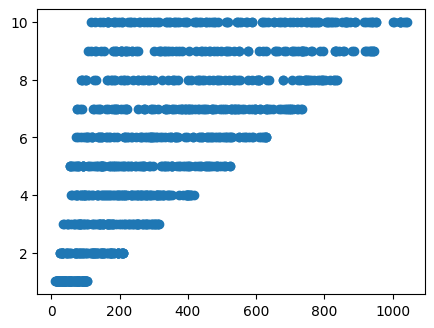

In [4]:
total = supermarket_sales.total
qty = supermarket_sales.quantity
plt.scatter(x=total, y=qty);

# Alternative Plot 1
# supermarket_sales.plot.scatter(x='total', y='quantity')

# Alternative Plot 2
# supermarket_sales.plot(x='total', y='quantity', kind='scatter')

Some correlation is definitely there.

### 3.2 Line Chart

With a line chart, we can see the trend or evolution of variables.

In this case the data has a time dimension. We can investigate if there are trends or seasonalities in the sales. Our time variable is `date` and the variable we want to investigate for trends or seasonalities is `total`.

In [5]:
sales_by_day = supermarket_sales.groupby('date', as_index=False)["total"].sum()
sales_by_day.head()

,date,total
0,1/1/2019,4745.1810
1,1/10/2019,3560.9490
2,1/11/2019,2114.9625
3,1/12/2019,5184.7635
4,1/13/2019,2451.2040


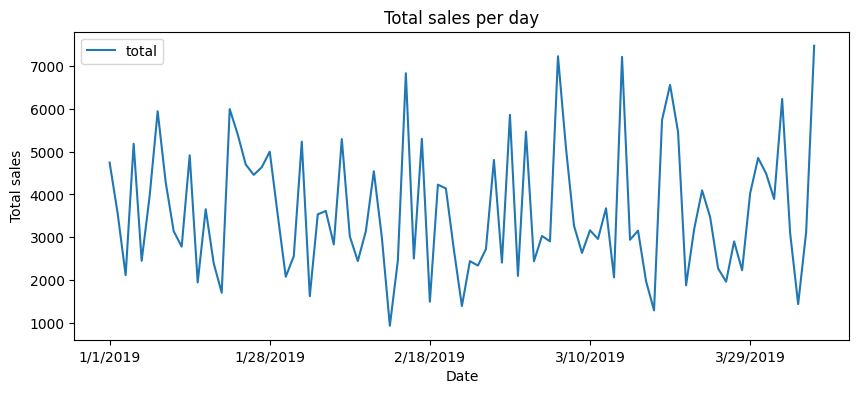

In [6]:
sales_by_day.plot.line(x='date', y='total', figsize=(10,4))

# Alternative Plot 1
# date = sales_by_day.date
# total = sales_by_day.total
# plt.plot(date, total)

# Alternative Plot 2
#sales_by_day.plot(x='date', y='total')

plt.title('Total sales per day')
plt.xlabel('Date')
plt.ylabel('Total sales');

No trends are visible over this time interval.

### 3.3 Column Chart

Bar charts are great to perform comparisons of discrete quantities such as the values of categorical ordinal variables. How would you plot the count of purchases for every mean `unit_price`? Let us show you.

We will first calculate the mean unit price by dividing the purchase `total` by the `quantity` of units bought. We round the unit price to tens of dollars. We then count how many purchases were transacted for every mean unit price.

In [7]:
purchases_by_unit_price = supermarket_sales[['total','quantity']].copy()
purchases_by_unit_price['mean_unit_price'] = purchases_by_unit_price.apply(lambda x: (x['total']/x['quantity']).round(-1), axis=1)
purchases_by_unit_price = purchases_by_unit_price.groupby('mean_unit_price', as_index=False)['total'].count()
purchases_by_unit_price.head()

,mean_unit_price,total
0,10.0,40
1,20.0,118
2,30.0,98
3,40.0,102
4,50.0,111


Now we plot the number of purchases for each mean unit price.

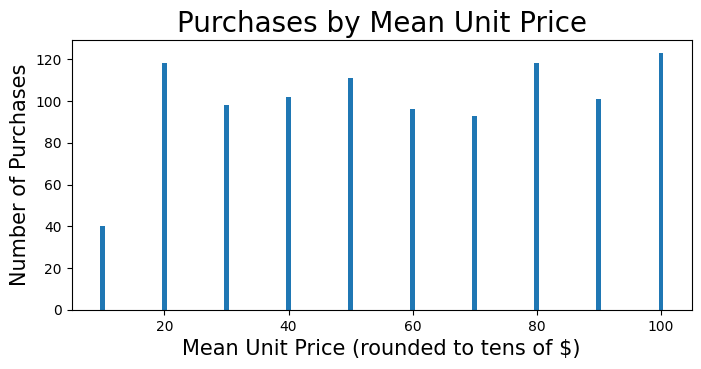

In [8]:
upd = purchases_by_unit_price.mean_unit_price
total = purchases_by_unit_price.total
plt.figure(figsize=(8,3.5))
plt.bar(upd, total)

# purchases_by_unit_price.plot.bar(x='mean_unit_price', y='total')

# Alternative Plot
# purchases_by_unit_price.plot(x='mean_unit_price', y='total', kind='bar')

plt.xlabel('Mean Unit Price (rounded to tens of $)', size=15)
plt.ylabel('Number of Purchases', size=15)
plt.title('Purchases by Mean Unit Price', size=20);

### 3.4 Bar Chart

To perform comparisons of values of nominal categorical variables. We want to compare the median price by product_line.

In [9]:
price_per_product_line = supermarket_sales[['total','quantity','product_line']].copy()
price_per_product_line['median_unit_price'] = price_per_product_line.apply(lambda x: (x['total']/x['quantity']), axis=1)
price_per_product_line = price_per_product_line.groupby('product_line', as_index=False)['median_unit_price'].median()
price_per_product_line

,product_line,median_unit_price
0,Electronic accessories,54.08025
1,Fashion accessories,57.84450
2,Food and beverages,56.69475
3,Health and beauty,60.27525
4,Home and lifestyle,58.36950
5,Sports and travel,61.58250


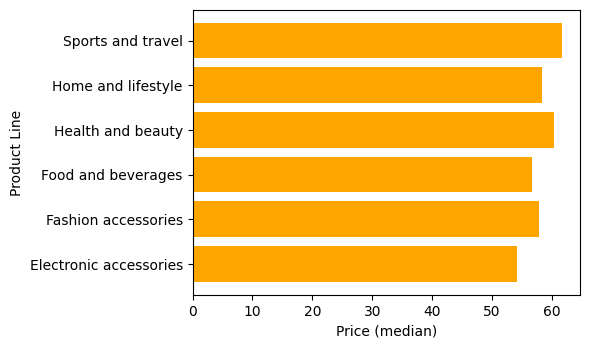

In [10]:
pl = price_per_product_line.product_line
mup = price_per_product_line.median_unit_price
plt.barh(pl, mup, color=['orange']);

# Alternative Plot 1
# price_per_product_line.plot.barh(x='product_line', y='median_unit_price', color=['orange'])

# Alternative Plot 2
#price_per_product_line.plot(x='product_line', y='median_unit_price', color=['orange'], kind='barh')

plt.xlabel('Price (median)')
plt.ylabel('Product Line');

### 3.5 Histogram

To make sure that nothing is fishy with the data. We want to visualize how the total sales are distributed in the city of Yangon. We want to see especially the sales up to 500 dollars, so we limit the x-axis to this value.

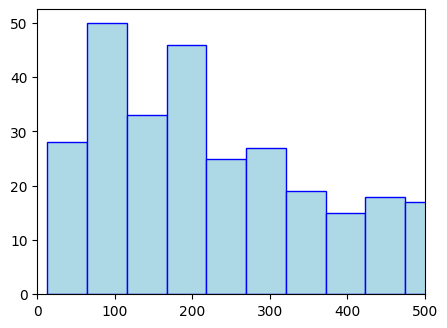

In [11]:
yangon_sales = supermarket_sales[supermarket_sales['city'] == 'Yangon']
total = yangon_sales.total
plt.hist(total, color=['lightblue'], bins=20, edgecolor='blue')
plt.xlim(0,500);

# yangon_sales.total.plot.hist(xlim=(0, 500), color=['lightblue'], bins=20, edgecolor='blue')

# Alternative Plot
#yangon_sales.total.plot(xlim=(0, 500), color=['lightblue'], bins=20, kind='hist', edgecolor='blue')


### 3.6 Boxplot

To compare how a variable distribution for different groups. We will plot the total sales for different types of payment.

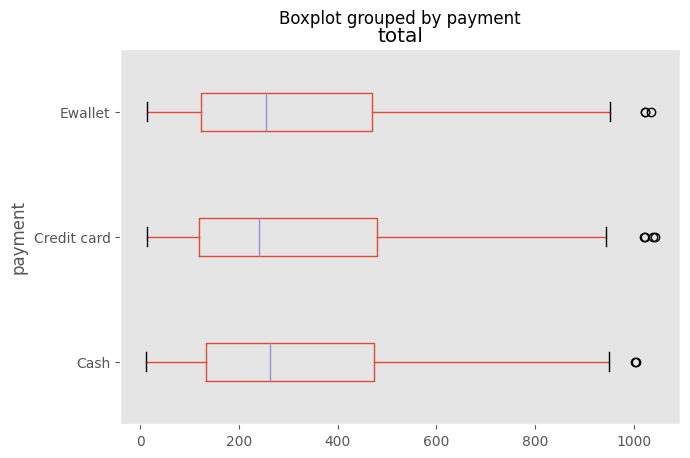

In [12]:
#clear the old style
plt.style.use('default')

# use a new style
plt.style.use("ggplot")

supermarket_sales.boxplot(
    column='total', 
    by='payment', 
    vert=False,
    figsize=(7,5), 
    grid=False,
    fontsize=10,
);